In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("/content/Titanic-Dataset (1).csv")


In [32]:
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [33]:
print("\n Missing Values (Before Cleaning):")
print(df.isnull().sum())


 Missing Values (Before Cleaning):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [34]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns='Cabin')

print("\n Missing Values (After Cleaning):")
print(df.isnull().sum())


 Missing Values (After Cleaning):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [35]:
print("\n Mean Values:")
print(df.mean(numeric_only=True))

print("\n Median Values:")
print(df.median(numeric_only=True))

print("\n Mode Values:")
print(df.mode(numeric_only=True).iloc[0])

print("\n Standard Deviation:")
print(df.std(numeric_only=True))

print("\n Skewness:")
print(df.skew(numeric_only=True))

print("\n Kurtosis:")
print(df.kurtosis(numeric_only=True))


 Mean Values:
PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.361582
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

 Median Values:
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

 Mode Values:
PassengerId     1.00
Survived        0.00
Pclass          3.00
Age            28.00
SibSp           0.00
Parch           0.00
Fare            8.05
Name: 0, dtype: float64

 Standard Deviation:
PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             13.019697
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

 Skewness:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dty

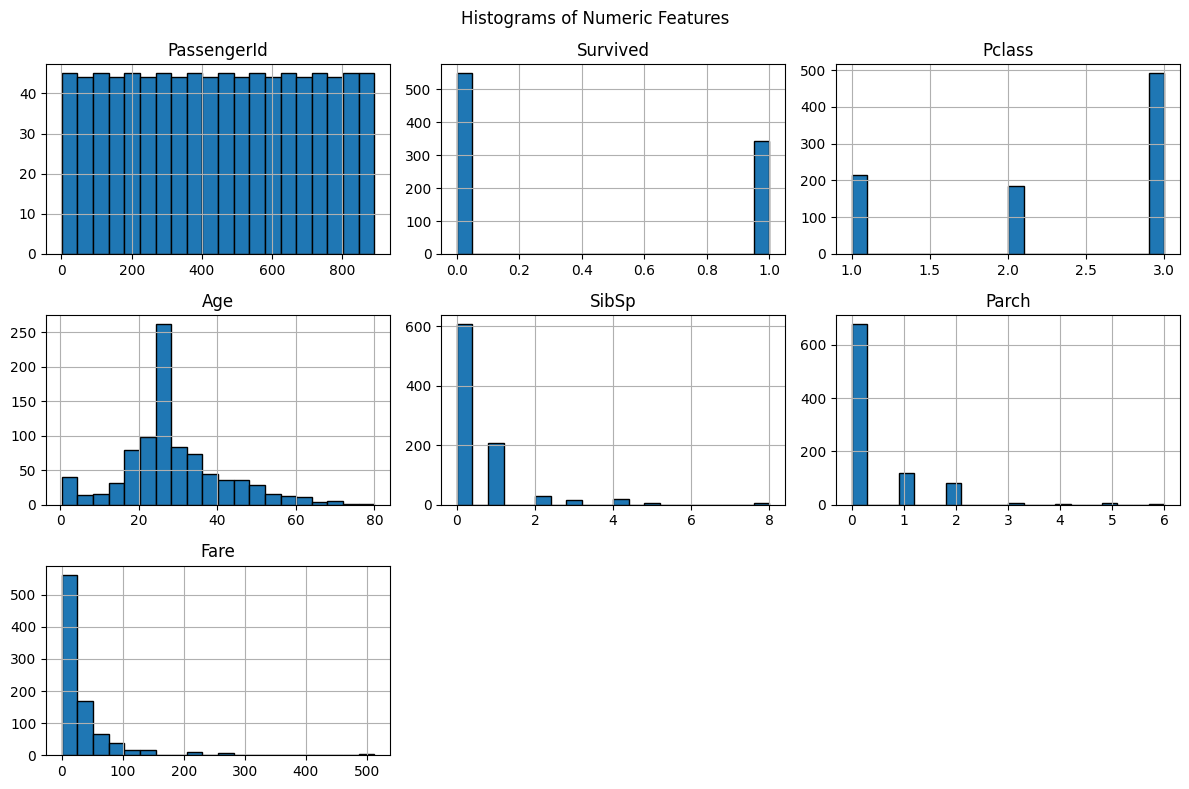

In [36]:
numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

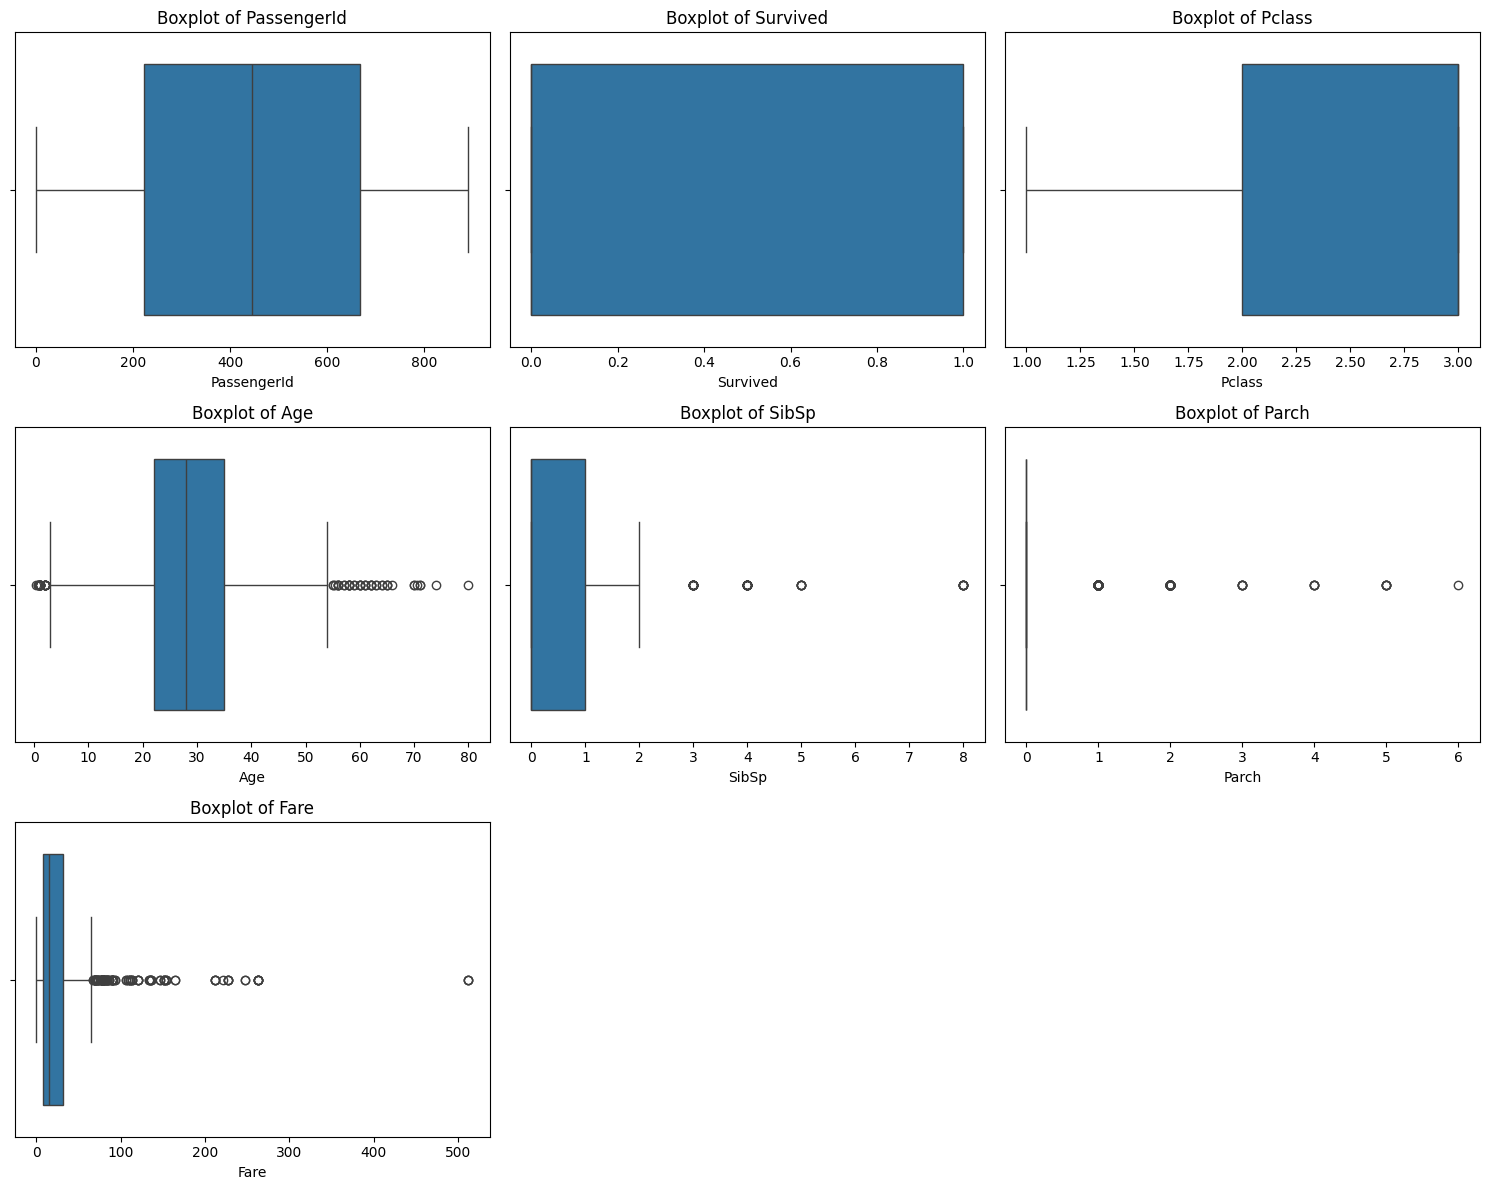

In [37]:
import math
num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for idx, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, idx + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

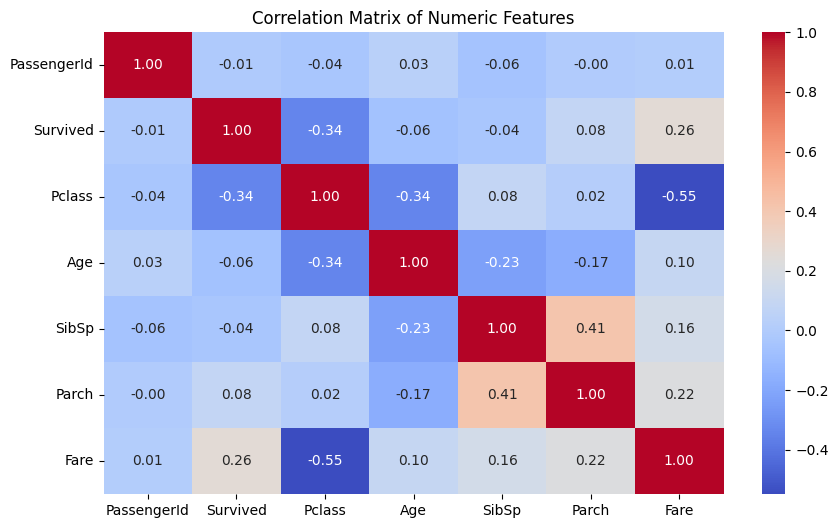

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

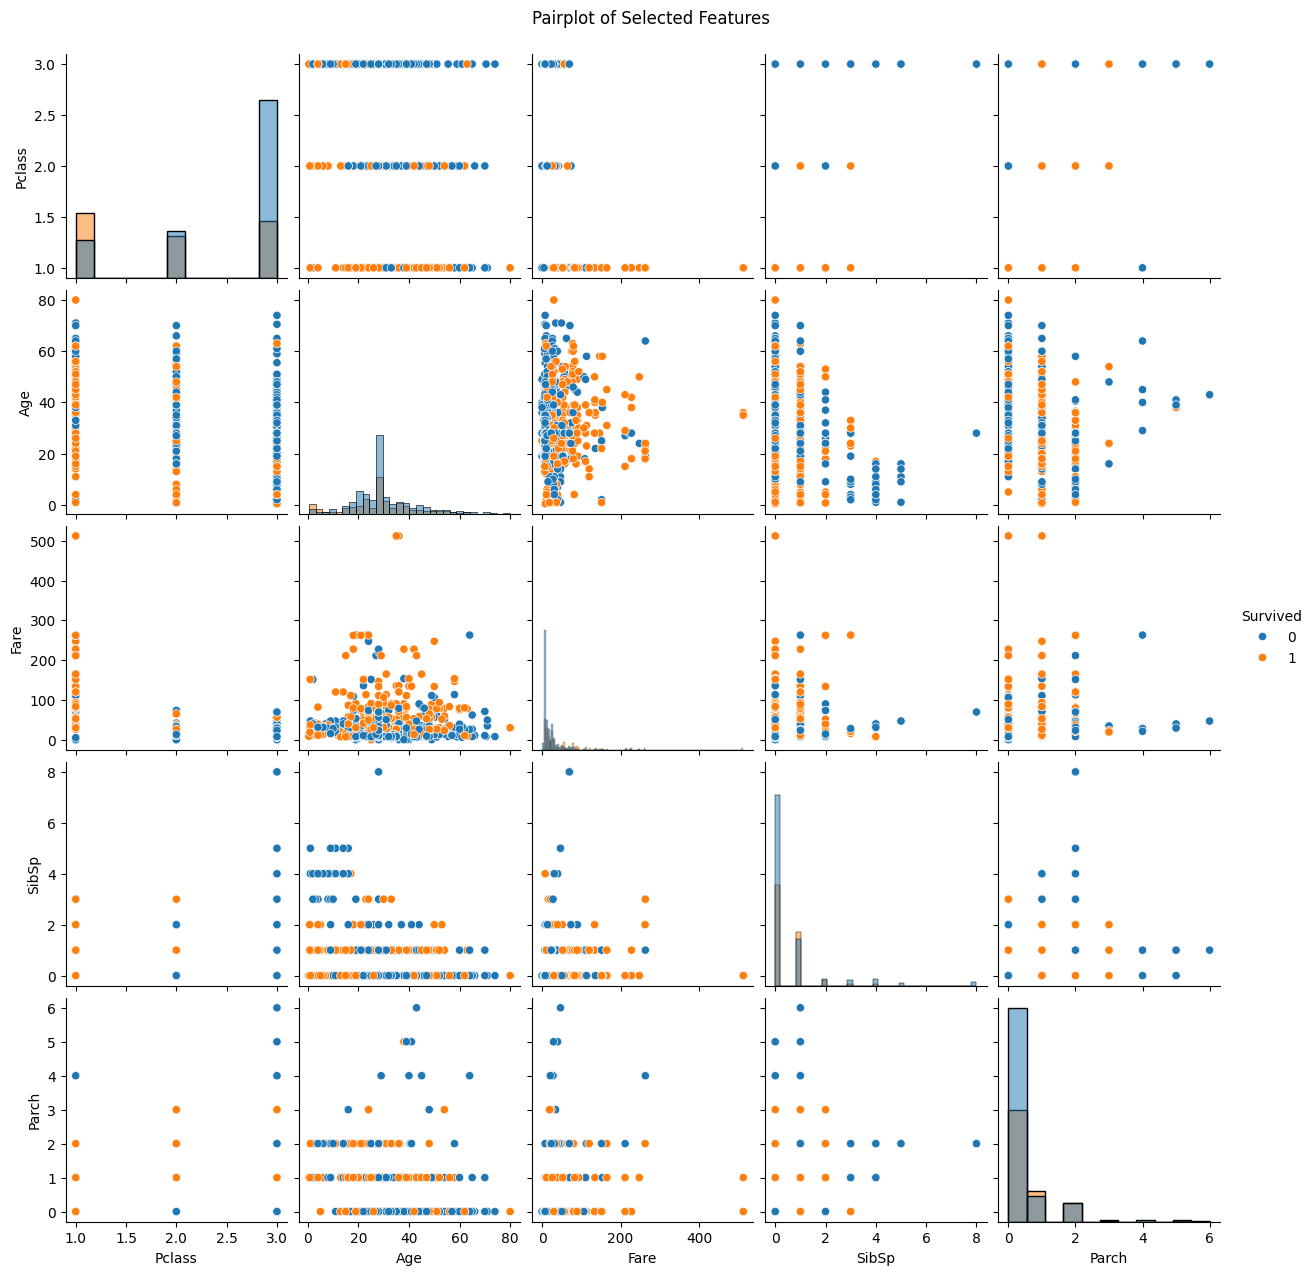

In [39]:
selected_features = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]

pairplot_df = df[selected_features].dropna()
pairplot_df["Survived"] = pairplot_df["Survived"].astype(int)

sns.pairplot(pairplot_df, hue="Survived", diag_kind="hist")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()